<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/11_lstm_nonlinear_sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM (Nonlinear Sine)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

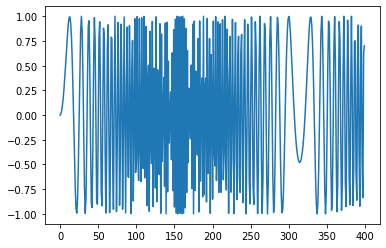

In [ ]:
series = np.sin((0.1 * np.arange(400)) ** 2) #   + 0.1 * np.random.randn(200)

plt.plot(series)
plt.show()

T = 10
D = 1
X = []
y = []
for t in range(len(series) - T):
    X.append(series[t:t + T])
    y.append(series[t + T])
X = np.asarray(X).reshape(-1, T, D)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

Epoch 1/200
7/7 [==============================] - 0s 58ms/step - loss: 0.5368 - val_loss: 0.5932
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5440 - val_loss: 0.5538
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5211 - val_loss: 0.5913
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4986 - val_loss: 0.5890
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4933 - val_loss: 0.5653
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4766 - val_loss: 0.5965
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4473 - val_loss: 0.4976
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4188 - val_loss: 0.3828
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3402 - val_loss: 0.3660
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2450 - val_loss: 0.2590
Epoch 11/200
7/7 [==========

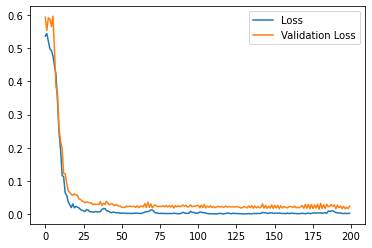

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T, 1)),
    tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.05), loss='mse')

r = model.fit(X_train, y_train, validation_data=(X_test, y_test),
              batch_size=32, epochs=200)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

## One-step forcast

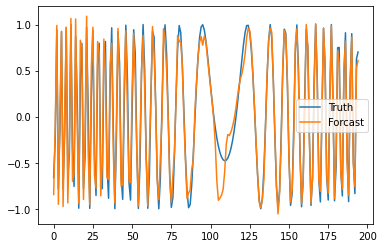

In [ ]:
forcast = []
for i in range(len(y_test)):
    p = model.predict(X_test[i].reshape(1, T, D))[0, 0]
    forcast.append(p)

plt.plot(y_test, label='Truth')
plt.plot(forcast, label='Forcast')
plt.legend()
plt.show()

## Multi-step forcast

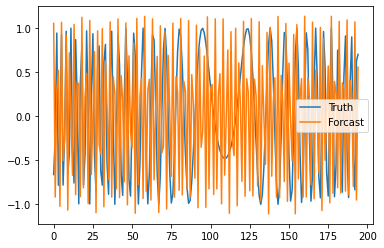

In [ ]:
forcast = []
last_x = X_train[-1]
for i in range(len(y_test)):
    p = model.predict(last_x.reshape(1, T, D))[0, 0]
    forcast.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(y_test, label='Truth')
plt.plot(forcast, label='Forcast')
plt.legend()
plt.show()